In [3]:

import importlib
import psim.models.shiftNMF
importlib.reload(psim.models.shiftNMF)
from psim.models.shiftNMF import ShiftNMF
#from shiftNMFDiscTau import ShiftNMF
from psim.models.nnls_l1 import nnls
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from psim.helpers.generators import *
from psim.data import MyDataset
from psim.models.Hardmodel_single_peaks import Single_Model
from psim.models.Hardmodel import Hard_Model
import scipy
from scipy.signal import find_peaks
import itertools
from psim.helpers.fit_functions import *
from psim.helpers.plot import *
import torch
from pathlib import Path

# Data

In [2]:
# Create a gridspec object with 2 rows and 3 columns
from psim.helpers.plot import *
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

dataset = MyDataset(Path("../data/raw"))

X_ART, H_ART, W_ART, TAU_ART = dataset.generate_artificial_data()

fig = plt.figure(figsize=(12, 6))
N, M = X_ART.shape

# Plot H and H_est
ax1 = plt.subplot(gs[0])
plotSpaced(ax1, np.arange(H_ART.shape[1]), H_ART.T)
ax1.set_title('H true')

ax2 = plt.subplot(gs[1])
ax2.set_title('W true')
hinton(W_ART.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(TAU_ART, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau true')
change_violin_colors(violin_parts, color_list=['blue']*N)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# Set tight layout
plt.tight_layout()
plt.show()

OSError: Reader needs file name or open file-like object

# shiftNMF

In [3]:
torch.manual_seed(42)

nmf = ShiftNMF(X_ART_NOISY, 3, lr=0.1, alpha=1e-6, patience=30, min_imp=-10000)
W_est, H_est, tau_est = nmf.fit(verbose=1, max_iter=1000, tau_iter=0)


epoch: 1000, Loss: 0.03508159835359101, Tau: 6761.3770047232255


Found peaks:[10829 11625 12426 13220 16729 18024 19324]
sigma: 225.83439198111282 n:0.8410308376943706
sigma: 246.37139936753388 n:1.2814901570792803e-06
sigma: 243.99808024766048 n:0.06076705786580596
sigma: 248.61473280432307 n:0.7104120443273455
sigma: 532.7240932638514 n:0.7863955026168321
sigma: 589.9960685226074 n:3.278110220629577e-07
sigma: 607.39489900996 n:0.4102087182526036
Lorentzian %:ss: 0.010216382522417349
tensor([1.0000e+00, 9.7257e-09, 2.6816e-14, 1.0000e+00, 7.6743e-01, 1.2690e-08,
        6.3839e-01], grad_fn=<SigmoidBackward0>)
Sigma:
Parameter containing:
tensor([256.2345, 263.5474, 261.1995, 271.9110, 604.4823, 616.6476, 617.9937],
       requires_grad=True)
hypothesises:
{(0, 1, 4, 5), (0, 1, 6), (0, 5), (1, 2, 4, 6), (0, 1, 2, 4, 5), (0, 2, 4, 6), (3, 4, 5, 6), (2, 4, 5), (0, 2, 4), (0, 1, 5, 6), (3, 6), (0, 3, 5), (2, 3, 4, 5, 6), (0, 1, 4, 5, 6), (2, 4), (0, 2, 6), (0, 2, 3, 4, 6), (0, 1, 2, 3), (1, 2, 3, 5, 6), (1, 3, 5, 6), (6,), (0, 1, 3, 4, 6), (0, 1, 2, 

c:\Users\lucas\Documents\UNI\Bachelorprojekt\nlars.py:64: LinAlgWarning: Ill-conditioned matrix (rcond=5.94009e-08): result may not be accurate.
  w = solve(XtX[np.ix_(A, A)], s)


Loss: 0.032372938037592225
means:
[12025.    18025.666 17376.5  ]
sigmas:
[263.2231  613.0412  610.56494]
J coupling:
[ 796. 1295. 1295.]
multiplicity
[4 3 2]
N
[0.12103762 0.00417938 0.00020459]
W:
[[  0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.       282.97388
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.       479.03015    0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         0.         0.         0.
    0.         0.         0.         5.163278   0.  

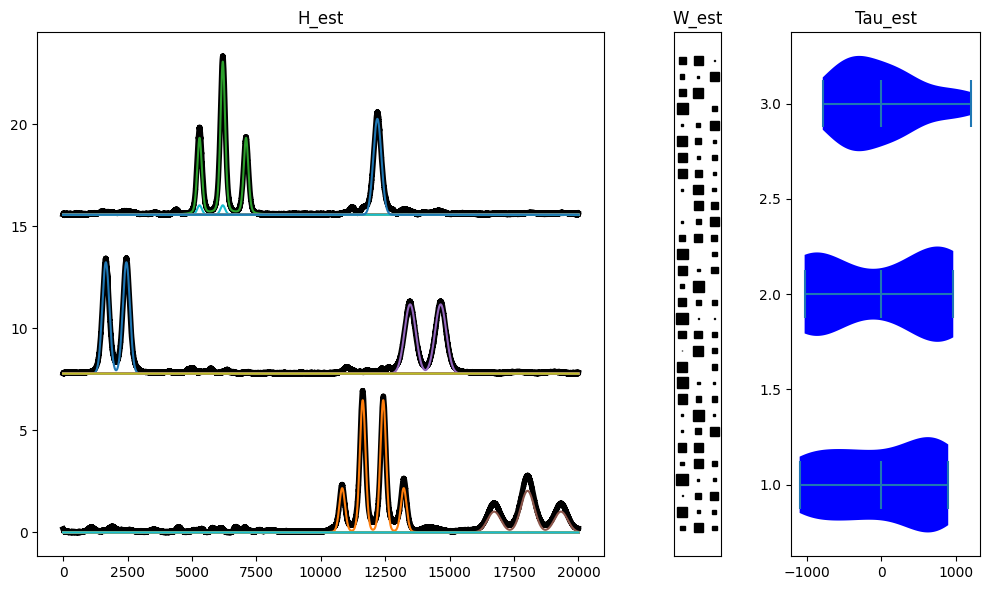

In [14]:

fig = plt.figure(figsize=(10, 6))
# Create a gridspec object with 2 rows and 3 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[3, 1, 1])

# Plot H and H_est
ax1 = plt.subplot(gs[0])
# plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
ax1.set_title('H_est')
x = np.arange(H_est.shape[1])

ax2 = plt.subplot(gs[1])
ax2.set_title('W_est')
hinton(W_est.T, ax=ax2)

ax3 = plt.subplot(gs[2])
violin_parts = ax3.violinplot(tau_est, showmeans=True, showmedians=False, vert=False)
ax3.set_title('Tau_est')
change_violin_colors(violin_parts, color_list=['blue']*3)
# change_violin_colors(violin_parts, [l.get_color() for l in ax3.get_children()[:3]])

# plt.figure(figsize=(15,5))
# plt.plot(H_est.T)
# plt.savefig("shiftcomponents")
# plt.clf()
ymax = 0
for i in range(len(H_est)):
    ymax = max(ymax,(H_est[i]/np.std(H_est[i])).max())
yoffset = ymax
reg_paths = []
lambda_axis = []
C_path = []
losses = []

for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i], plot=False)
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n)

    W, C, running_loss, path, lambdas, loss = hardmodel.fit(verbose=True, return_loss=True, threshold=0.35)
    reg_paths.append(path)
    lambda_axis.append(lambdas)
    C_path.append(C)
    losses.append(loss)
    means, sigma, j_coup, mult, n, w = hardmodel.return_values()
    print("means:")
    print(means)
    print("sigmas:")
    print(sigma)
    print("J coupling:")
    print(j_coup)
    print("multiplicity")
    print(mult)
    print("N")
    print(n)

    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    # plt.figure(figsize=(15,5))
    # plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5, color="k")
    ax1.plot(x,H_est[i]/np.std(H_est[i])+yoffset*i, linewidth=4, color="k")
    for j, vec in enumerate(C):
        ax1.plot(x,vec*W[:,j]+yoffset*i)
# Set tight layout
plt.tight_layout()
plt.show()

[1.0, 0.4910148536790195, 0.48128689935527097, 0.18003111285671844, 0.14591845883873242, 0.13101097000398926, 0.12240389588424762, 0.11603622585676421, 0.11489178157253727, 0.11379339173461243, 0.11140456522283652, 0.11053614262322262, 0.10153223717599776, 0.09853296030276525, 0.09723217416499708, 0.09703938319291804, 0.09663094384603109, 0.09597660885509926, 0.09309167520485427, 0.09264558100569069, 0.09253957122485594, 0.0911462767069348, 0.09074324349588765, 0.08944002036435458, 0.08823146599534891, 0.08786113021005346, 0.08723190087796828, 0.0868721851772829, 0.08671781400243002, 0.08626435826909135, 0.08472952954578608, 0.08466196049214426, 0.0845075382365005, 0.084223239504141, 0.08359053377773915, 0.08289591903911793, 0.08181137293938893, 0.08173759316391976, 0.08121984175764609, 0.08096279360783583, 0.08044237514584054, 0.08024778909889069, 0.08024190176351326, 0.08014111715085455, 0.0800131684233276, 0.0798380723270822, 0.07983653071020357, 0.07982803949901272, 0.0798243848610

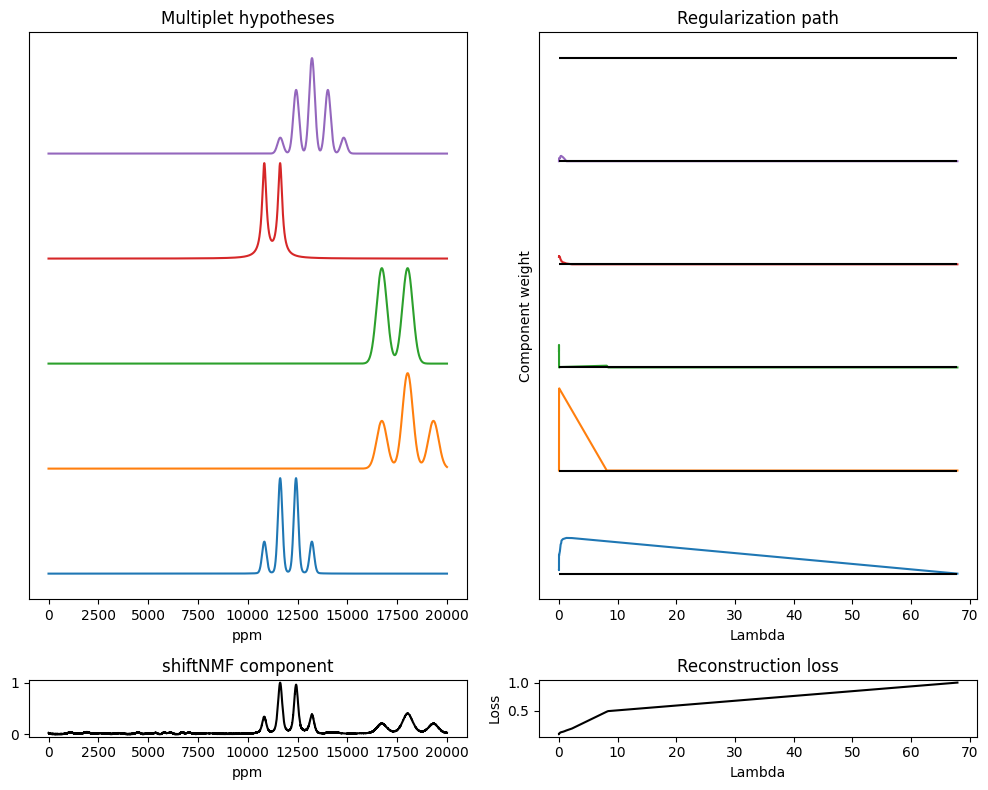

[1.0, 0.6950117289688575, 0.09825826800277533, 0.0980260796417125, 0.09802059942764733, 0.0942395955118465, 0.09325785454480535, 0.09315356048684294, 0.09314388418504566, 0.09308126790465042, 0.0930805890828767, 0.09307726979319944]
[0 4 2 3 8 1 5 6 7]


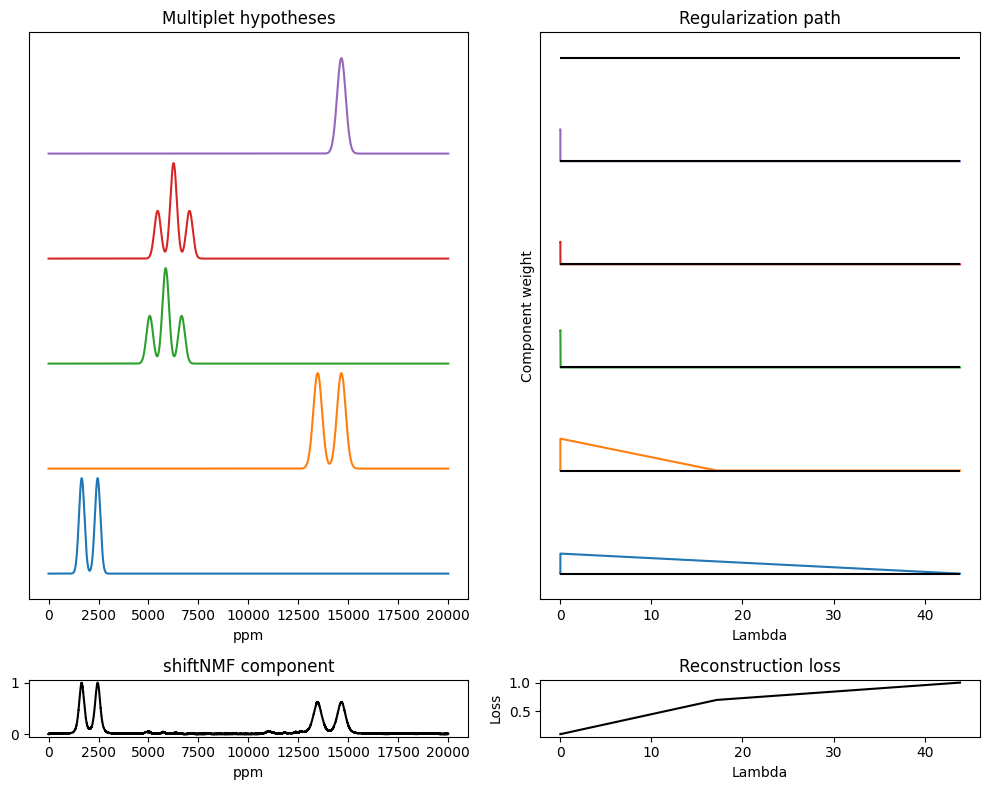

[1.0, 0.8961598901381078, 0.597983214976793, 0.10233741720595661, 0.09948368651407917, 0.09850191755395073, 0.09779165179165475, 0.09763196641133678, 0.09739609898647081]
[ 3 11  0  8  7 10  5  1  2  4  6  9]


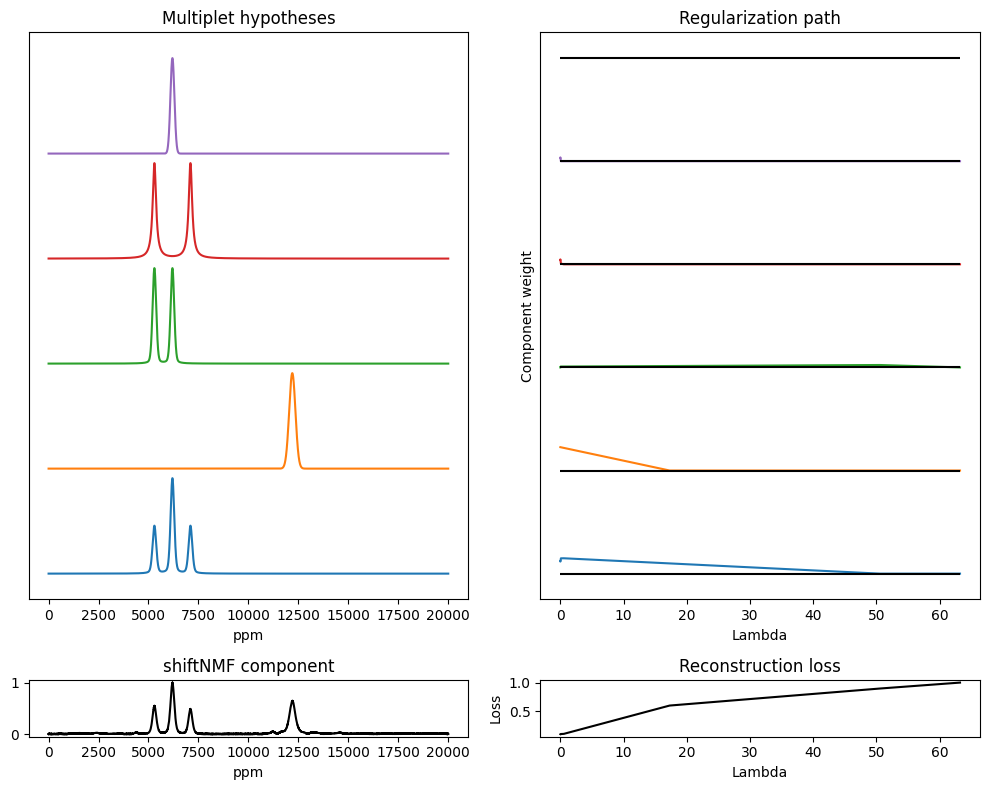

In [16]:

for i in range(len(reg_paths)):
    path = reg_paths[i][0]
    lambdas = lambda_axis[i][0]
    C = C_path[i]
    loss = losses[i]
    print(loss)
    fig = plt.figure(figsize=(10, 8))
    # Create a gridspec object with 2 rows and 3 columns
    gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[10,1])

    # Plot H and H_est
    ax1 = plt.subplot(gs[0])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax1.set_title('Multiplet hypotheses')

    ax1.set_xlabel("ppm")
   
    x = np.arange(H_est.shape[1])

    ax2 = plt.subplot(gs[1])
    ax2.set_title('Regularization path')
    ax2.set_xlabel("Lambda")
    ax2.set_ylabel("Component weight")

    ax1.tick_params(left = False, labelleft = False)
    ax2.tick_params(left = False, labelleft = False)

    ax3 = plt.subplot(gs[2])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax3.set_title('shiftNMF component')
    ax3.plot(H_est[i]/max(H_est[i]), color="k")
    ax3.set_xlabel("ppm")

    ax4 = plt.subplot(gs[3])
    # plotSpaced(ax1, np.arange(H_est.shape[1]), H_est.T)
    ax4.set_title('Reconstruction loss')
    ax4.plot(lambdas, loss, color="k")
    ax4.set_xlabel("Lambda")
    ax4.set_ylabel("Loss")

   
    sort_indices = np.argsort([np.trapz(p,lambdas) for p in path])
    print(sort_indices)
    path = path[sort_indices]
    C = C[sort_indices]

    ymax = 1.1
    yoffset = ymax
    t = 0

#     nr_of_components = len(C)
    nr_of_components = 5

    for j in range(nr_of_components):
            ax1.plot(x,C[j]/max(C[j])+yoffset*t)
            t += 1

    
    ymax = path.max()
    yoffset = ymax
    t = 0
    for j in range(nr_of_components):
            ax2.plot(lambdas,path[j]+yoffset*t)
            ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")
            t +=1
    ax2.hlines(yoffset*t,lambdas[-1],lambdas[0], color="k")


    plt.tight_layout()
    plt.savefig("pat"+str(i))
    plt.show()

# peak finding (single fit)

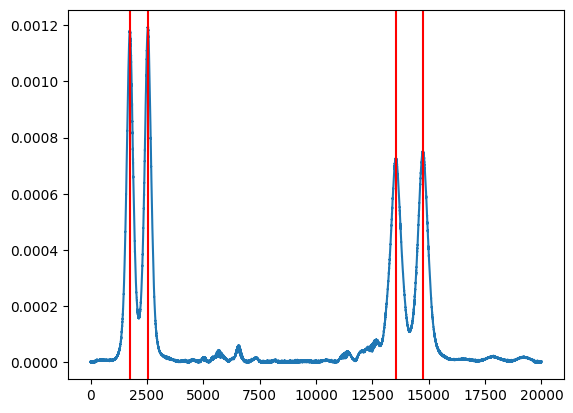

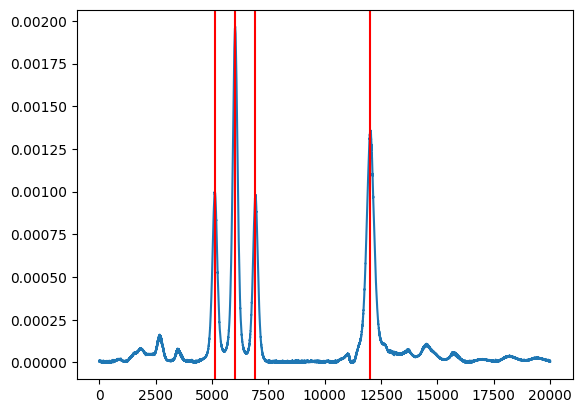

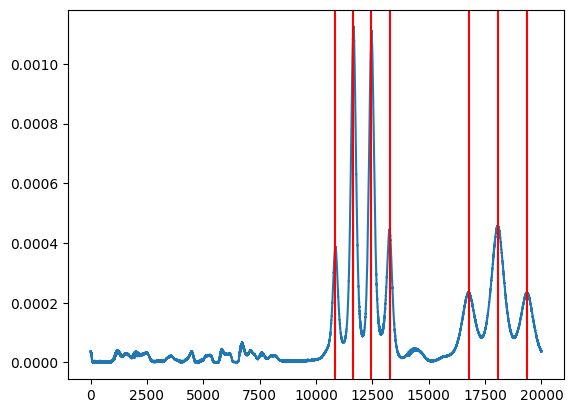

In [ ]:

for i in range(len(H_est)):
    plt.plot(H_est[i])
    #peaks = find_peaks_cwt(H_est[i], [100,300])
    peaks = find_peaks(H_est[i], height=max(H_est[i])/10)[0]
    sigmas = scipy.signal.peak_widths(H_est[i], peaks, wlen=1000)[0]/2 #.355*1.5
    select = [sig>100 for sig in sigmas]
    select = [i for i, x in enumerate(select) if x == False]
    sigmas = np.delete(sigmas, select)
    peaks = np.delete(np.array(peaks), select)
    for mean in peaks:
        plt.axvline(mean, color='r')
    plt.show()

# Hardmodel

In [ ]:
for i in range(len(H_est)):
    means, sigmas, n = single_fit(H_est[i])
    #diff_matrix = calc_difference_matrix(sigmas)
    diff_matrix = calc_difference_matrix(np.ones((len(sigmas))))
    hypothesis = peak_hypothesis(diff_matrix, cutoff=10/100)
    hardmodel = Hard_Model(H_est[i], hypothesis, means, sigmas, n, lr=10, alpha = 1e-3, factor=1, patience=1, min_imp=0.01)
    W, C = hardmodel.fit(verbose=True, alpha=0.2)
    print("W:")
    print(W)
    ## TODO change this to be the true underlying components from H_ART not the shift found components, they need to be scaled accordingly.
    plt.plot(H_est[i]/np.std(H_est[i]), linewidth=5)

    for i, vec in enumerate(C):
        plt.plot(vec*W[:,i])
    plt.title("C weigthed")
    plt.show()

Found peaks:[ 1748  2549 13549 14743]


KeyboardInterrupt: 